# Introduction
For the ADS assignment, we are tasked to apply machine learning on 2 or 3 datasets.
    - Iris dataset with data about the petal and sepal sizes
    - Wine dataset with data about what was used to make the wine
    - Optionally, Breast cancer diagnostic dataset characteristics of the cell nuclei present in the image
We are going to analyze these datasets to find out what features will work best and apply machine learning with these features.
We will both be using SKLearns kNN and we will be writing our own algorithm.
We have decided not to use the breast cancer diagnostic dataset because of complications with the dataset. There was no clear identifier and we did not understand the documentation.

**This challenge has been made by Bart de Bever and Katherine Manders to achieve the best possible report.**

### Importing the libaries

We are going to import the libaries and print the current version we are using. 
The versions are quite important, there could be some errors if you are not using the most recent version of the libaries.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from IPython.display import clear_output


print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-learn version:', sk.__version__)
print('Matplotlib version:', matplotlib.__version__)

%matplotlib inline

NumPy version: 1.12.1
Pandas version: 0.20.1
Scikit-learn version: 0.18.1
Matplotlib version: 2.0.2


# Analyzing the datasets

### The iris dataset
The iris dataset is about the iris flower species.
http://archive.ics.uci.edu/ml/datasets/Iris

### The Wine Dataset
The wine dataset is about three kinds of wine.
http://archive.ics.uci.edu/ml/datasets/Wine


## Importing the datasets

The given datasets are CSV files, these files can be easaly transfomed into a dataframe using the pandas read_csv function. 


In [51]:
# the iris dataset
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
# the wine dataset
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

#  The iris dataset


### Preparing the dataset
After seeing this information we can prepare the dataset. Firstly we are going to give the dataframe column names. This makes the dataframe easyer to read. 


```py
df_iris.info()
```
With the .info function we get some extra information about the dataset. We can see the datatypes, the number of rows and if there is missing data.



#### Whenever we would like to check how the preparation worked out we can use the following functions:

```py
df_iris.head(5)
```
For showing the first 5 rows of the dataframe

```py
df_iris.tail(5)
```
For showing the last 5 rows of the dataframe


```py
df_iris.shape
```
The shape function gives the number of rows and the number of columns.

In [52]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Labeling the species

The species column declares the kind of species in text. 
Since we are going to make a machine learning for it, it would be better if we would work with numbers (0,1,2).
Therefore we are going to add a label column to the dataframe with a transformed value of the species.


```py
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
```
In this piece of code we are making a new column named label. This label column is going to be filled with a mapped version of the species column. The map function automaticly maps all the species into the the assigned label.

In [54]:
## Giving the Iris-Setosa 0, Iris-Versicolor 1 and the Iris-Virginica 2
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [55]:
df_iris.tail(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


## Boxplot

To have a closer look at the features we are going to make some boxplots. 
This gives a visual feedback about how the features are ranged in there values.
With this visual feedback we can make it easyer to choose features for the algorithm. 

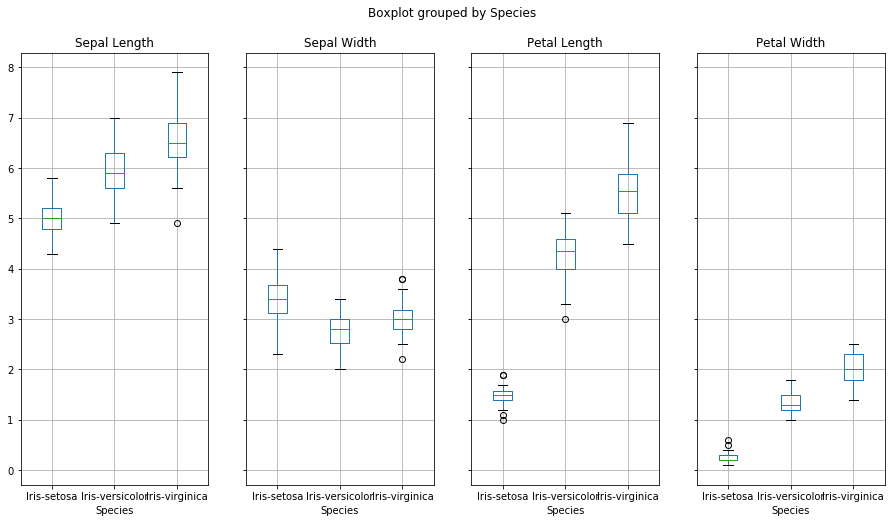

In [56]:
features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));  

#### Creating bloxplots



Boxplots are useful for visualizing the spread and skew of data. 
The line in the middle of the box represents the median of the data, and the box represents the bounds of the 1st and 3rd quartiles. Half of the data exists within the box. 
The "whiskers" indicate the range of the data-except for outliers, which are plotted outside the whiskers.
Outliers are 1.5 times or more the interquartile range.'
All of these values are place in a tuple.
```py
features = tuple(df_iris.columns[:4].values)
```

For creating the boxplot there is an build in function. We have to specify the column (what are the features we have just created above). The by is where we are going to split it on, so in this case that is the species. The figsize and layout are for the visualisation. 
```py
df_iris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));  
```

To train the dataset we are splitting the dataset in 3 different sets. The X set containing the sepal data, the Z data containing the Petal data and the y set containing the labels of the iris flowers.
The y label is going to be used to check if the predictions are right.

In [59]:
def testtrain(dataframe, features, label, size, random):
    x = dataframe[features]
    y = dataframe[label]

    scaler = StandardScaler().fit(x)
    x = scaler.transform(x)
    return train_test_split(x,y,test_size=size, random_state=random)
X_train, X_test, y_train, y_test = testtrain(df_iris, ["Petal Length", "Petal Width"], "Label", 0.25, 33)
print(len(X_train))

112


# Automatically spliting train and test data
### Defining the method
To start off, we want to create a method that can normalize and split the data. We simply call this `testtrain` as this is its function.
```py
def testtrain(dataframe, features, label, size , random):
```
#### Parameters
    dataframe: The dataframe needing to be modified
    features:  A list of features that you want to be split
    label:     A list of labels
    size:      The test size from the dataset (Example, 0.25 will make 25% of the dataset testdata)
    random:    The random state to be used in the splitting
This method will return the X_train, X_test, y_train, y_test just like the original method.
### Splitting features and labels
We start off by simply splitting the data into a x and y.
```py
    x = dataframe[features]
    y = dataframe[label]
```
### Normalizing the features
We want to normalize the features for better results in SKLearn. This can be done with 2 lines of code.
```py
    scaler = StandardScaler().fit(x)
    x = scaler.transform(x)
```
### Splitting train and test data
To split the train and test data, we use the build in method from SKLearn.
```py
return train_test_split(x,y,test_size=size, random_state=random)
```

## Visualisation of the datasets

Scatterplots are usefull for visualisation of two choosen features.
Since we are making a nearest neighbor algorithm it can really come in handy to see how the labels are spreaded through the scatterplot.

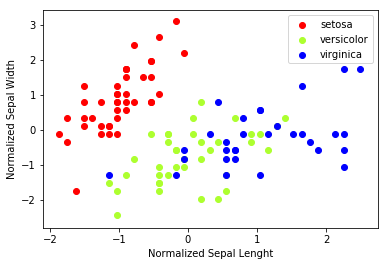

In [61]:
X_train, X_test, y_train, y_test = testtrain(df_iris, ["Sepal Length", "Sepal Width"], "Label", 0.25, 33)
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel('Normalized Sepal Lenght')
plt.ylabel('Normalized Sepal Width');

When using the Sepal features there is no clear dividing betwen the Versicolor and the Virginica flowers. 
That would make it difficult to determine which flower it is.

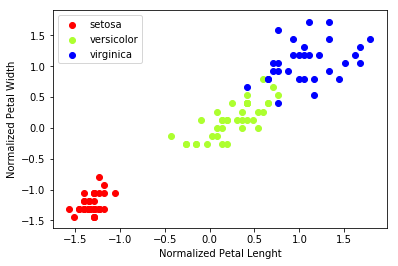

In [62]:
X_train, X_test, y_train, y_test = testtrain(df_iris, ["Petal Length", "Petal Width"], "Label", 0.25, 33)
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel('Normalized Petal Lenght')
plt.ylabel('Normalized Petal Width');

When using the Petal features there is a clear dividing between all of the flowers. There is just a small piece where the Versicolor and the Verginica flowers overlap.

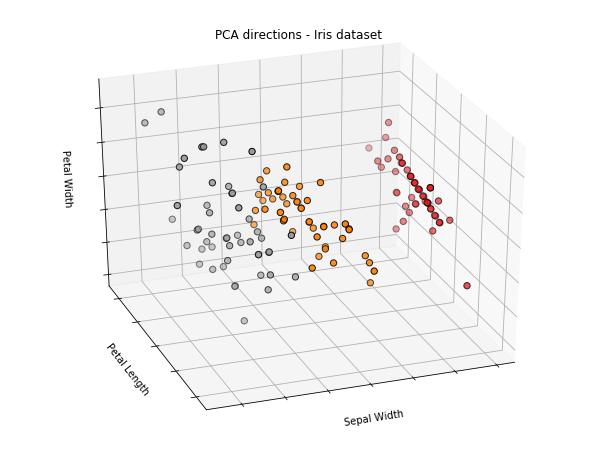

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris[['Sepal Width', 'Petal Length', 'Petal Width']])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("PCA directions - Iris dataset")
ax.set_xlabel("Sepal Width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Petal Length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Width")
ax.w_zaxis.set_ticklabels([])

plt.show()

#### Creating the 3D visualisation

We first have to import some libaries that we are going to use for 3D repesentation.
```py
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
```

Creating a new figure
```py
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
```


The X_reduced contains a normalized value of the Sepal Width, Petal Length and Petal Width. 
The ax.scatter is for placing the dots in the right places. c=y makes sure that the labels are connected with the right dots.
```py
X_reduced = PCA(n_components=3).fit_transform(df_iris[['Sepal Width', 'Petal Length', 'Petal Width']])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
```

For setting the titles in the visualisation it is important to keep the same order as in the dataframe mentioned above. 
```py
ax.set_title("PCA directions - Iris dataset")
ax.set_xlabel("Sepal Width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Petal Length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Width")
ax.w_zaxis.set_ticklabels([])
```

To make the visualisation visable, this can take up some time.
```py
plt.show()
```

### Conclusion
From the graphs seen above we have decided to use Petal Width and Petal Length to be our features. There were clear differences that we could use to identify the label. The other features had a lot of overlap and were basically unusable.

# The wine dataset

The wine dataset has 13 features and one identifier column. 
In this dataset there are no missing values. Because there already is an identifier there is no noeed to add a label column.

In [64]:
df_wine.columns = ['Identifier','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df_wine.head(5)

,Identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [65]:
df_wine.tail(5)

,Identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [66]:
df_wine.shape

(178, 14)

## Boxplot the features of the dataset

By looking at the boxplots we are able to select some features that will give the better feedback on the dataset.

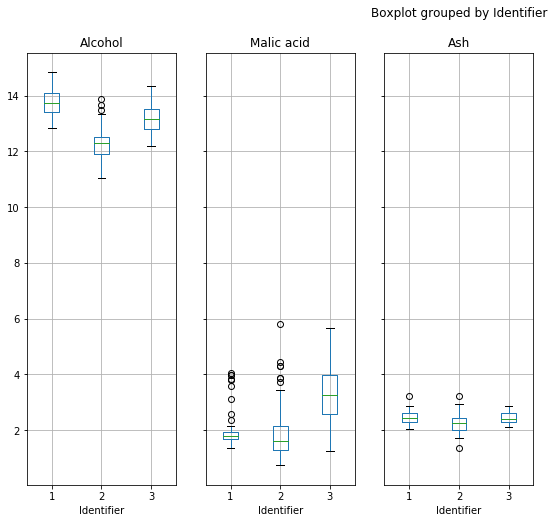

In [67]:
features = tuple(df_wine.columns[1:4].values)
df_wine.boxplot(column=features, by='Identifier', figsize=(15,8), layout=(1,5));       

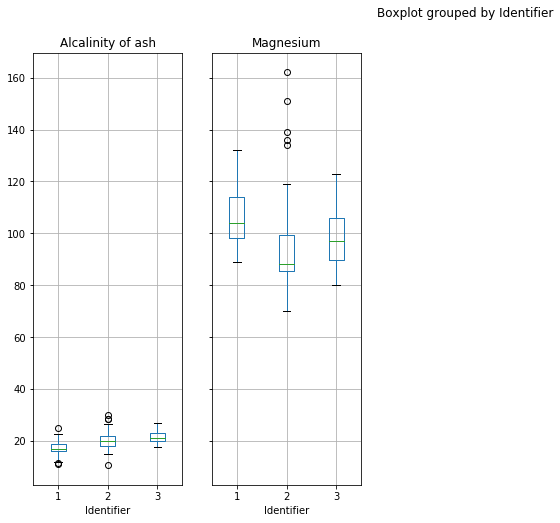

In [69]:
features = tuple(df_wine.columns[4:6].values)
df_wine.boxplot(column=features, by='Identifier', figsize=(15,8), layout=(1,5));       

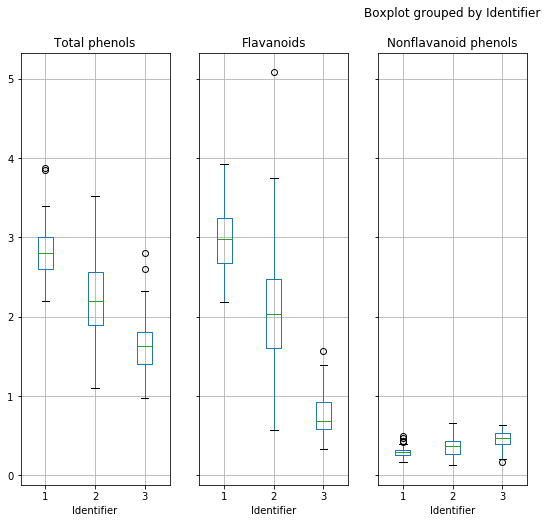

In [70]:
features = tuple(df_wine.columns[6:9].values)
df_wine.boxplot(column=features, by='Identifier', figsize=(15,8), layout=(1,5));  

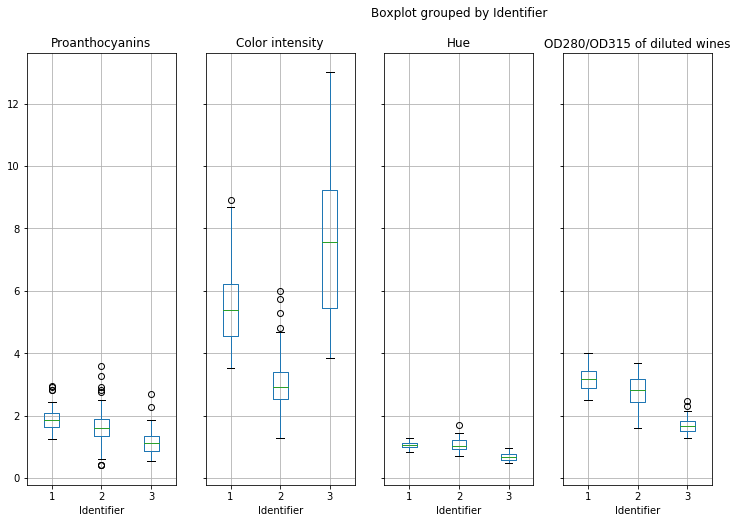

In [71]:
features = tuple(dfeatures = tuple(df_wine.columns[13:].values)
df_wine.boxplot(column=features, by='Identifier', figsize=(15,8), layout=(1,5));  f_wine.columns[9:13].values)
df_wine.boxplot(column=features, by='Identifier', figsize=(15,8), layout=(1,5));  

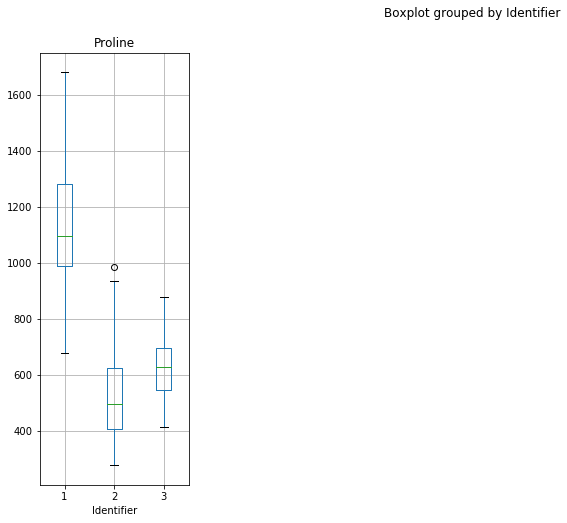

In [72]:
features = tuple(df_wine.columns[13:].values)
df_wine.boxplot(column=features, by='Identifier', figsize=(15,8), layout=(1,5));  

## Selecting the features

We are selecting the features based on the boxplots we made above. The values that have the least crossing values are the best for using in machine learning. After this we can make some combinations and look how they turn out in scatterplots.

In [75]:
A = df_wine[['Flavanoids', 'Proline']]
B = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']]
C = df_wine[['Malic acid', 'Color intensity']]
D = df_wine[['Flavanoids', 'OD280/OD315 of diluted wines']]
E = df_wine[['Alcohol', 'Malic acid']]
F = df_wine[['Flavanoids', 'Color intensity']]
G = df_wine[['Alcalinity of ash', 'Color intensity']]
H = df_wine[['Alcohol', 'Color intensity']]
I = df_wine[['Total phenols', 'Flavanoids']]
J = df_wine[['Total phenols', 'Color intensity']]
K = df_wine[['Total phenols', 'Proline']]
L = df_wine[['Proline', 'Color intensity']]
M = df_wine[['Proline', 'Flavanoids']]
N = df_wine[['Color intensity', 'Flavanoids']]

features = [A,B,C,D,E,F,G,H,I,J,K,L,M,N]
y = df_wine['Identifier']

# Making the graphs
We wanted to automate the creation of graphs to lower the manual work needing to be done. To start off we defined a list called features. This list contains a set of 2 features each that went want to test against each other.
```py
features = [A,B,C,D,E,F,G,H,I,J,K,L,M,N]
```
### Prepairing for the graph
We save the names of the columns to later add them to the graph.
```py
names = list(value)
```
We also want to prepair a few colors to add them to the graph later. We make a list of 3 colors and this can be saved as string.
```py
colors = ('red', 'greenyellow', 'blue')
```
### Normalizing the data
We normalize the data to make it easier to work with. It takes less computing power to predict for and it is easier to work with in graphs. SKLearn prefers normalized data so we will do this as well. We made this into a powerful oneliner:
```py
value = StandardScaler().fit(value).transform(value)
```
### Splitting test and train data
To start off training the algorithm, we need to first split the data into train and test data. This is so we don't test our model on the same data that we have trained it with. SKLearn has a method for this we can get by importing the library.
```py
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(value,y,test_size=0.25, random_state=60)
```
### Setting up the axis
To start off, we create a loop that will go through every color and there for also every label. We want to calculate the value on the X axis and the Y axis. We do this by looking at the normalized values we got before into X_train. X_train currently only holds 2 features. This means we can set the X as the first feature and the Y as the second one.
So we get the first axis by looking in X_train for the first feature with `X_train[:, 0]` after that we only want the current color's values. Our colors go from 0 to 2 but our labels from 1 to 3. So we have to up our i by 1. This results in a second filter with `[y_train.as_matrix() == i+1]`. For the Y axis we do the same thing but with feature 1 instead of 0.
Resulting in the following lines:
```py
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i+1]
    x2s = X_train[:, 1][y_train.as_matrix() == i+1]
```
Lastly we want to make the plot work. We are going to use the `scatter()` function from matplotlib to display our graph. This needs X and Y points which we have just created. Optionally we can also use the `c` parameter to give a color.
```py
plt.scatter(x1s, x2s, c=colors[i])
```
This gets added to the loop so we add it to our existing plot. Only after `plt.show()` has been called does the plot get finalized. Before we do that we would want to do some visual changed to make it easier to read. First we add a legend with `1, 2 and 3` in it to represent the labels. Then we add the names to the plot. matplotlib has a build in method for this called `plt.xlabel(label)` and `plt.ylabel(label)`. We saved a list of names earlier in an array with the same name. We can use `names[0]` to get the first name and `names[1]` to get the second one. Because the data is normalized we thought it would be appropriate to also mention that in the label. Lastly we excecute `plt.show()` to make the plots appear.
```py
plt.legend(['1', '2', '3'])
plt.xlabel("Normalized " + names[0])
plt.ylabel("Normalized " + names[1]);
plt.show()
```
**Note:** At the start of the document we put a line of code that will make all matplotlib graphs display in the document itself.
```py
%matplotlib inline
```

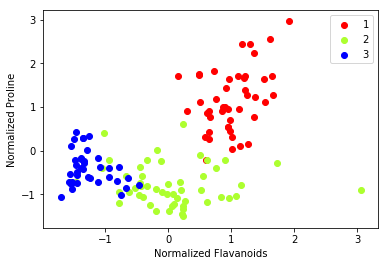

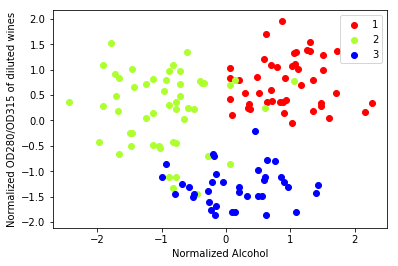

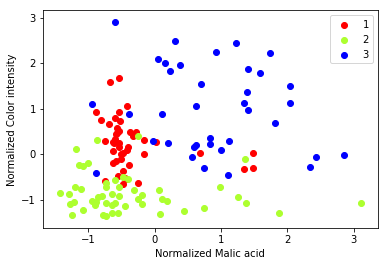

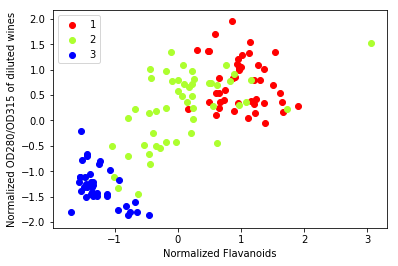

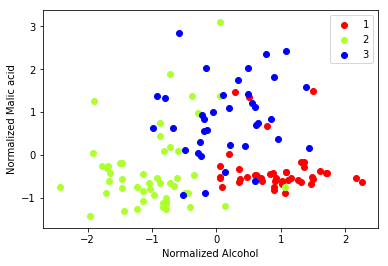

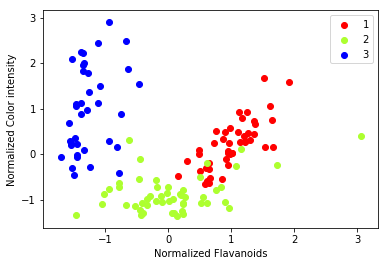

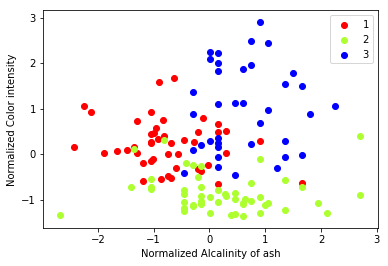

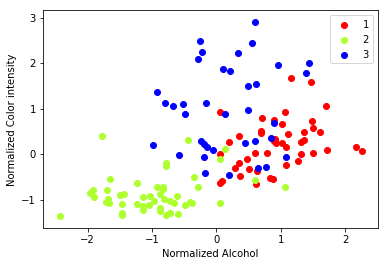

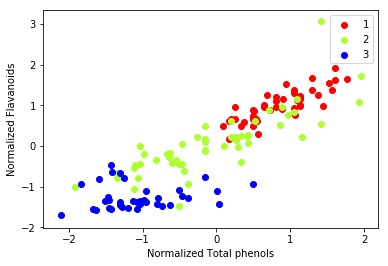

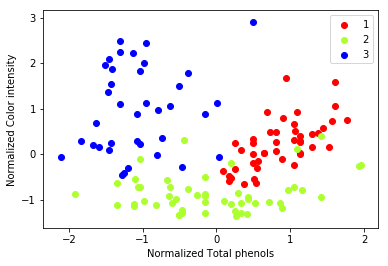

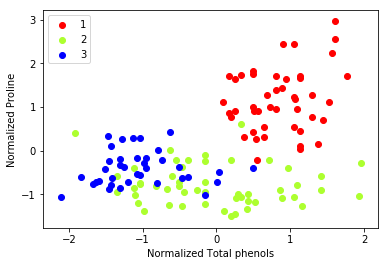

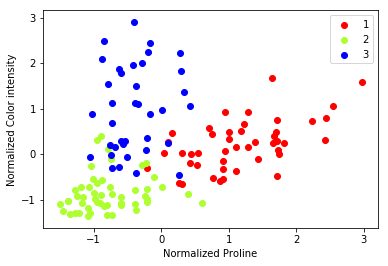

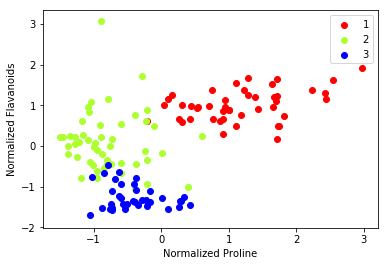

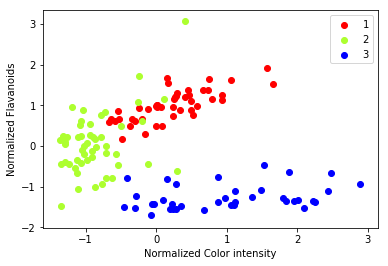

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

for value in features:
    names = list(value)
    value = StandardScaler().fit(value).transform(value)
    X_train, X_test, y_train, y_test = train_test_split(value,y,test_size=0.25, random_state=60)
    colors = ('red', 'greenyellow', 'blue')

    for i in range(len(colors)):
        x1s = X_train[:, 0][y_train.as_matrix() == i+1]
        x2s = X_train[:, 1][y_train.as_matrix() == i+1]
        plt.scatter(x1s, x2s, c=colors[i])

    plt.legend(['1', '2', '3'])
    plt.xlabel("Normalized " + names[0])
    plt.ylabel("Normalized " + names[1]);
    plt.show()

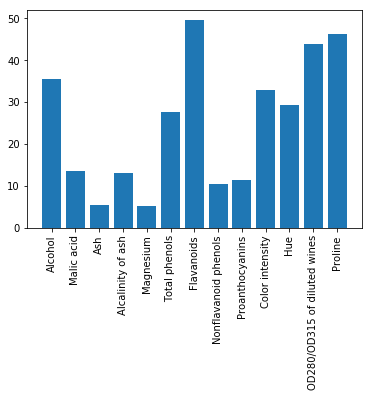

In [77]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(df_wine[predictors], df_wine["Identifier"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

#### SelectKBest

Making decisions about what features to use can be really difficult. Therefore we are going to use the SelectKBest function. We can create a barchart out of these results. The results with the highest scores are the ones that will have the best spreading for making a machine learning algoritmn with. 


Import the SelectKbest and f_classif
```py
from sklearn.feature_selection import SelectKBest, f_classif
```

The precictors are the columns that are in de dataset. All of the columns that we name below are included.
```py
predictors = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
```

The selector calls the function selectKBest and we use the f_classif for making it work with the features.
```py
selector = SelectKBest(f_classif, k=5)
selector.fit(df_wine[predictors], df_wine["Identifier"])
```

The scores are calculated with the function below.
```py
scores = -np.log10(selector.pvalues_)
```
For making a visual representation of the scores we are going to make a barchart.
This barchart uses the predictors as the X axis and the scores for the 

```py
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()
```

### Conclusion

After looking at our barcharts there are 5 features we  have selected.  The Alcohol, the Flavanoids, The color Intensity, the OD280/OD315 of diluted wines and the proline.

These five features combined make an accuracy of 97.777777777%. We could not have figured this out by looking at the boxplots. Therefore it is better to use the selectKBest function.

# Applying machine learning

In [8]:
def knn(trainset, labelsresult, point, k):
    dist = DistanceMetric.get_metric('euclidean')
    closest = []                                                        #We prepare an array to save the closests points in
    if (k < len(trainset)):                                             #You can't have more points than in the dataset.
        for i in range(0,k):
            closest.append([9999,0])
        for i in range(len(trainset)):
            distance = 0
            for c in range(len(trainset[0])):
                distance = distance + dist.pairwise(dist.pairwise([[point[c]], [trainset[i][c]]]))[0][1] #Add the distance between each feature to the total
            for c in range(0,k):
                if (distance < closest[c][0]):
                    closest[c][0] = distance
                    closest[c][1] = i
                    c = k

    result = []
    for x in np.nditer(labelsresult):
        result.append(int(x))
    predlabels = []
    for i in range(0,k):
        point = closest[i][1]
        predlabels.append(result[point])
    return max(set(predlabels), key=predlabels.count) #https://stackoverflow.com/a/1518632
knn(x_train, y_train, [2,3,1,1], 5)

2

# Writing our own method
### Preperation
We start using Euclidean Distance Metrics and saving it in the `dist` variable.
Then we prepare the closest array. In there we will store the 2 values, the distance to the point being tested and the index in the array. Before we start the entire method, we want to check if there are more training points than the k. We can not look for more points then are in the set. We want to add the amount of points equal to k. This can simply be done in a loop starting with the code bellow.
```py
dist = DistanceMetric.get_metric('euclidean')
    closest = []                                                       
    if (k < len(trainset)):                                            
        for i in range(0,k):
            closest.append([9999,0])
```
### Calculating the distance
To start off, we loop through all the training points to collect the closest points. Within that we loop through the features and add the distance to the `distance` variable. We get a total distance of all features together.
```py
for i in range(len(trainset)):
           distance = 0
           for c in range(len(trainset[0])):
               distance = distance + dist.pairwise(dist.pairwise([[point[c]], [trainset[i][c]]]))[0][1]
```
### Comparing the distance to the closest points so far
We want to know which point is the clostest to our current point, still within the trainset loop, we go through all of our earlier created closest points and check if the distance is  shorter than the one stored. If that is the case, we override the distance with the new one and save the index with it and end the loop through the closest points. If we do not close this one, all the points would have been overwritten instead of only one. We do this for every point to create an array of the closest points. The code for this action:
```py
for c in range(0,k):
    if (distance < closest[c][0]):
        closest[c][0] = distance
        closest[c][1] = i
        c = k
```
### Fixing the y_train label array
Because of the nature of NumPy and SKLearn, the original indexes from the point array get send through. That means the array is a mess of random indexes and values assigned to it. I am unsure why this does not happen to the trainset's features. Because of this we need to reindex the array. NumPy does not have an easy solution for this so instead we iterate over all the values in the array and add them to a new array. The result is an array with indexes equal from 0 to the size of the array.
This has been done with the following code.
```py
result = []
    for x in np.nditer(labelsresult):
        result.append(int(x))
```
### Getting the labels
We have the closest points and their index and a sorted array with the labels. It's time to combine both of these and get the labels that the closest points have in an array. This is a very simple action of looking what the value is of the index in the label array and adding that to our new array.
```py
predlabels = []
for i in range(0,k):
    point = closest[i][1]
    predlabels.append(result[point])
```
### Predicting the label
One last line to sum everything up, we need to check the array for which label is in the most. This can be done using a dictonary. Because there was some insecurity on how to make this work properly, there is a oneliner that we coppied from StackOverflow. resulting in the following line.
```py
return max(set(predlabels), key=predlabels.count) #https://stackoverflow.com/a/1518632
```

In [24]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define Method
def knnfull(trainset, labelset, testset, testlabel, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model
    knn.fit(trainset, labelset)
    #Predit the result
    ypred = knn.predict(testset)
    #Return the accuracy score
    return accuracy_score(testlabel, ypred)
#Execute the Method and see the result
print("SKLearn's accuracy: " + str(knnfull(x_train, y_train, x_test, y_test, 5)*100) + "%")

SKLearn's accuracy: 92.1052631579%


# Working with SKLearn
### Loading the library
To use kNN we need to import 2 libraries this can easy be done by this piece of code.
```py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
```
### Defining the method
We want to make a method to easily use the SKLearn's kNN by sending a trainset, testset and the k. We do this by defining the method `knnfull`. This is done using this piece of code
```py
def knnfull(trainset, labelset, testset, testlabel, k):
```
#### Parameters:
    trainset:  The features that needs to be trained with.
    labelset:  The labels that belong to the trainset.
    testset:   The testset to test the accuracy.
    testlabel: The labels from the testset to test the accuracy.
    k:         The amount of neighbors that should be found.
### Defining knn
To start off we want to make an instance of the KNeighborsClassifier. Within this we need to define how many neighbors we want to find. This is our parameter k and can be done using the following line of code:
```py
knn = KNeighborsClassifier(n_neighbors=k)
```
### Fitting the data
We need to fit the data to the trainset so we can use it to predict other points. This is done by one line of code
```py
knn.fit(trainset, labelset)
```
We give it our trainset and labelset so it can group out the points.
### Predicting the data and calcuting the accuracy
Now we are done with training the model, we can start predicting other datapoints. We can use the `knn.predict` method to simply predict one point or an array of points at once. So when we want to get the labels back from our testset we can ask that in one line
```py
ypred = knn.predict(testset)
```
Now that we know what the model thinks it is, we want to measure it against the truth. SKLearn has a method build in to calculate the percentage.
```py
return accuracy_score(testlabel, ypred)
```
This means our method will return a float equal to the percentage of the accuracy.

In [49]:
def accuracyknn(x_train, y_train, x_test, y_test, k):
    right = 0
    errors = 0
    actual = []
    mistakes = []
    print("Please fill in 0 for no debugging or 1 for debugging")
    debug = bool(int(input()))
    for x in np.nditer(y_test):
        #print(x)
        actual.append(int(x))
    #Loop through all the test data
    for i in range(len(y_test)):
        try:
            predicted = knn(x_train, y_train, x_test[i], 5)
            value = actual[i]
            #Execute the method made before and check it with the correct value
            if(debug):
                print("Guessed: " + str(predicted))
                print("Actual: "+ str(value))
                print('=======')
            if(predicted == value):
                    right = right + 1
            else:
                mistakes.append([predicted, value])
        except KeyError as details:
            print(details)
            #Random KeyError is throw.
            errors = errors + 1
    if(debug == False):
        clear_output()
    print("Amount of cases: " + str(len(x_test)))
    print("Right perdiction: " + str(right))
    print("Amount with errors: " + str(errors))
    print("Accuracy with errors: " +str(right/len(x_test)*100)+"%")
    print("Accuracy without errors: " + str(right/(len(x_test)-errors)*100) + "%")
    if(len(mistakes)>0):
        print("Mistakes made:")
        for i in range(len(mistakes)):
            print("==============")
            print("Predicted: " + str(mistakes[i][0]))
            print("Actual: " + str(mistakes[i][1]))
accuracyknn(x_train, y_train, x_test, y_test, 5)

Amount of cases: 38
Right perdiction: 37
Amount with errors: 0
Accuracy with errors: 97.36842105263158%
Accuracy without errors: 97.36842105263158%
Mistakes made:
Predicted: 1
Actual: 2


# Calculating the accuracy
### Defining the method
To accommodate for the iris and wine dataset, we gave the accuracy method parameters. Originally this was hardcoded for only the iris dataset but to relief ourselves from doing twice the workload.
```py
def accuracyknn(x_train, y_train, x_test, y_test, k):
```
#### Parameters
    x_train: The part of the dataset ment for training
    y_train: The labels that correspond to the trainingset
    x_test:  The part of the dataset ment for testing
    y_test:  The labels that correspond to the testingset
    k:       The amount of neighbors that should be found
### Setting up our variables
To start of we are going to set a few variables to be used in the future.
```py
    right = 0
    errors = 0
    actual = []
    mistakes = []
    print("Please fill in 0 for no debugging or 1 for debugging")
    debug = bool(int(input()))
```
#### Variables
    right:    The amount of answers that were right.
    errors:   The amount of errors encountered.
    actual:   The right labels that come with the testset (more on that later)
    mistakes: The amount of mistakes made by the algorithm
    debug:    If the program should be run in debug mode.
              Debug mode will show all the predicted and right labels.
### Fixing the y_test
Like before we need to index the labels properly to prevent KeyErrors from occurring. This is done by the same method as before and saved in the `actual` variable.
```py
    for x in np.nditer(y_test):
        actual.append(int(x))
```
### Calculating the accuracy part 1
Now we have the proper values we can start the calculating process. We start by making a loop that will go through all of the values in `x_test`. These will be run through the `knn()` method, since this method returns the label that the point is supposed to be we can compare it to the label which belongs to this piece of data. We also temporarily set the label in the value variable. This just makes it easier to print out and work with in the future.
```py
for i in range(len(y_test)):
    try:
        predicted = knn(x_train, y_train, x_test[i], 5)
        value = actual[i]
```
##### Optional Debug Option
If we want to see if the calculations are done correctly, we want to see every prediction and actual label. If the `debug` variable is true, these should be printed out. This is done using the following piece of code:
```py
if(debug):
    print("Guessed: " + str(predicted))
    print("Actual: "+ str(value))
    print('=======')
```
### Calculating the accuracy part 2
Now we have both values we can compare them and see if they are equal. If these are equal we want to up the `right` variable by one. If this is wrong, we save the mistake in the `mistakes` list. The mistake is saved as a list with the guessed value first and then the actual value.
```py
if(predicted == value):
    right = right + 1
else:
    mistakes.append([predicted, value])
```
We used a `try` in the beginning and that was for a reason, during experimentation we encountered multiple `KeyErrors`. Since we wanted to see the program run even with errors we added a try expect and wanted to count the errors.
```py
except KeyError as details:
    print(details)
    #Random KeyError is throw.
    errors = errors + 1
```
To make the user experience a bit more enjoyable we added a screen clear.
```py
if(debug == False):
    clear_output()
```
### Printing the results
Now the calculations are done we can print out all the values that were saved. We loop through the mistakes and print out all the predicted and actual labels.
```py
print("Amount of cases: " + str(len(x_test)))
print("Right perdiction: " + str(right))
print("Amount with errors: " + str(errors))
print("Accuracy with errors: " +str(right/len(x_test)*100)+"%")
print("Accuracy without errors: " + str(right/(len(x_test)-errors)*100) + "%")
if(len(mistakes)>0):
    print("Mistakes made:")
    for i in range(len(mistakes)):
        print("==============")
        print("Predicted: " + str(mistakes[i][0]))
        print("Actual: " + str(mistakes[i][1]))
```


# Extra: making an user interface

In [81]:
def selection():
    print("Select your source: 0 = Iris, 1 = Wine")
    dataset = int(input())
    clear_output()
    if(dataset == 0):
        df = df_iris
        print("Selected Iris.")
    else:
        df = df_wine
        print("Selected Wine")
    #Dataset is selected and saved under df
    loop = True
    features = []
    clear_output()
    print("Input the features, type stop to end this process.")
    print("List of columns: " + str(list((df))))
    while(loop):
        feature = input()
        if(feature == "stop"):
            loop = False
        else:
            features.append(feature)
            print("Added " + feature)
    clear_output()
    print("Selected features: " + str(features))
    print("List of columns: " + str(list((df))))
    print("Please select a label column.")
    label = [str(input())]
    x_train, x_test, y_train, y_test = testtrain(df, features, label, 0.25, 33)
    clear_output()
    print("Select method: 0 = Own algorithm, 1 = SKLearn")
    source = int(input())
    clear_output()
    print("Please input the k")
    k = int(input())
    clear_output()
    if(source == 0):
        accuracyknn(x_train, y_train, x_test, y_test, k)
    else:
        print("Accuracy " + str(knnfull(x_train, y_train, x_test, y_test, k)*100)+"%")
selection()

Accuracy 64.4444444444%


C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


# Explaining the user interface
Within this we want to make the user be able to easy select dataframe, features, labels, method and k.
This will all be done within the notebook and one codeblock. We will be using methods that we defined above
# Run all code in the notebook before running this code
Obviously this will not work in the PDF extract, for the best experience please run the notebook.

# Explaining the code
### Selecting dataframe
Right nopw the dataframes are hardcoded, we could have made it so you can import a dataframe by URL.
We've made it so 0 will select the iris set and 1 selects the wineset.
```py
print("Select your source: 0 = Iris, 1 = Wine")
dataset = int(input())
clear_output()
if(dataset == 0):
    df = dfiris
    print("Selected Iris.")
else:
    df = "wine"
    print("Selected Wine")
```
Due to the loose nature of Python, we are allowed to not define df within the if statements and don't need to define it beforehand. `input()` makes the textline popup and waits for user input. This is by default a string and can be converted in the normal way. `clear_output()` is a method within the IPython.Display library so we can give a better user experience.
### Selecting the features.
After the dataframe is selected, the user needs to select which features to use within the dataframe. To make it easy for the user, we allow them to see the list of column headers and give feedback on which is added. Right now it does not check for spelling errors. **If the user makes a spelling error the program will crash** (read more about this in the *Limitations* section). we added a stop word to make it easy for the loop to be stopped.
```py
loop = True
features = []
clear_output()
print("Input the features, type stop to end this process.")
print("List of columns: " + str(list((df))))
while(loop):
    feature = input()
    if(feature == "stop"):
        loop = False
     else:
         features.append(feature)
         print("Added " + feature)
```
### Selecting the label
For right now, it is only important that we select one label. Both of our dataframes only have one label and that one should be used. We again use a simple `input()` for this. To improve user experience further, we again print out a list of column headers and also which features have been selected before.
```py
clear_output()
print("Selected features: " + str(features))
print("List of columns: " + str(list((df))))
print("Please select a label column.")
label = [str(input())]
```
### Normalizing and splitting the data
To normalize and split the data we use the method we created before and the values we have collected so far.
```py
x_train, x_test, y_train, y_test = testtrain(df, features, label, 0.25, 33)
```
### Chosing the algorithm ot use and the k
As we have methods set up to use both the custom made algorithm or SKLearns kNN, we can make the user descided whichever they want to use. After that we also want to know what the user wants the k value to be.
```py
print("Select method: 0 = Own algorithm, 1 = SKLearn")
source = int(input())
clear_output()
print("Please input the k")
k = int(input())
clear_output()
if(source == 0):
    accuracyknn(x_train, y_train, x_test, y_test, k)
else:
    print("Accuracy " + str(knnfull(x_train, y_train, x_test, y_test, k)*100)+"%")
```

### Limitations
The user can currently not set the random state or size from the train test split. The user can only add one label and if something is missspelled the program crashes. This could be prevented by checking if the value excists within the columns headers but this would only add more complication to an already complicated piece of code.

# Static results
## Using SKLearn
### Iris dataset

In [83]:
X_train, X_test, y_train, y_test = testtrain(df_iris, ["Petal Length", "Petal Width"], ["Label"], 0.25, 33)
knnfull(X_train, y_train, X_test, y_test, 5)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.94736842105263153

### Wine dataset

In [84]:
X_train, X_test, y_train, y_test = testtrain(df_wine, ["Proline", "OD280/OD315 of diluted wines", "Flavanoids", "Alcohol", "Color intensity"], ["Identifier"], 0.25, 33)
knnfull(X_train, y_train, X_test, y_test, 5)

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.97777777777777775

## Using our own algorithm
### Iris dataset

In [85]:
X_train, X_test, y_train, y_test = testtrain(df_iris, ["Petal Length", "Petal Width"], ["Label"], 0.25, 33)
accuracyknn(X_train, y_train, X_test, y_test, 5)

Amount of cases: 38
Right perdiction: 36
Amount with errors: 0
Accuracy with errors: 94.73684210526315%
Accuracy without errors: 94.73684210526315%
Mistakes made:
Predicted: 1
Actual: 2
Predicted: 1
Actual: 2


## Wine dataset

In [86]:
X_train, X_test, y_train, y_test = testtrain(df_wine, ["Proline", "OD280/OD315 of diluted wines", "Flavanoids", "Alcohol", "Color intensity"], ["Identifier"], 0.25, 33)
accuracyknn(X_train, y_train, X_test, y_test, 5)

Amount of cases: 45
Right perdiction: 44
Amount with errors: 0
Accuracy with errors: 97.77777777777777%
Accuracy without errors: 97.77777777777777%
Mistakes made:
Predicted: 1
Actual: 2


# Conclusion, what have we learned
### Visualization of data
While it is possible to do all kind of graphs manually and work out which feature to use in that way, there are build in methods that can do this for you. We only found this out one day before the end of the project, if this was known earlier it would have saved us a lot of time.
### Building methods to save time in the future
A part of why the machine learning part went very smoothly is because of the build methods. Once you can simply use 2 methods and get a percentage on the accuracy of your algorithm, you can easily add new datasets without much trouble.
### Building our own algorithm
While a big challenge at first, you can start by working on the smaller bits first. Start by finding the point closets, hardcode some things for your dataset, give a point you know that works and slowly start working forwards. With these little steps you start to get the code and aren't blindly copying what people have already done. Once you have a hardcoded version you understand, it is not hard to use that knowledge to make an adaptable version.
### Experimentation makes things better
It's good to be curious on how to move forwards; what if I feed this method 3 features instead of 2? what if we make a 3D graph instead of an 2D graph? is a higher k always better? These are the kind of thoughts that made us improve the project. It's always helpful to have an exploring and experimental mind while doing these kind of projects.